<a href="https://colab.research.google.com/github/Gabriel-Leite-Py/LiverDiseaseDiagnosis_SNC/blob/main/SPRINGER_LIVER_2024_OL2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This code is intended to create graphical reports and studies on the data for the SPRINGER article for the OL2A 2024 conference.

## Data analysis

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_excel('Indian Liver Patient Dataset (ILPD).xlsx')

df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df['Selector'] = df['Selector'].replace({2: 0, 1: 1})
df_selector = df['Selector']

<ipython-input-1-5dc8b65af230>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


In [ ]:
print(df.describe())

              Age      Gender          TB          DB      Alkphos  \
count  583.000000  583.000000  583.000000  583.000000   583.000000   
mean    44.746141    0.756432    3.298799    1.486106   290.576329   
std     16.189833    0.429603    6.209522    2.808498   242.937989   
min      4.000000    0.000000    0.400000    0.100000    63.000000   
25%     33.000000    1.000000    0.800000    0.200000   175.500000   
50%     45.000000    1.000000    1.000000    0.300000   208.000000   
75%     58.000000    1.000000    2.600000    1.300000   298.000000   
max     90.000000    1.000000   75.000000   19.700000  2110.000000   

              Sgpt         Sgot          TP         ALB     AGRatio  \
count   583.000000   583.000000  583.000000  583.000000  579.000000   
mean     80.713551   109.910806    6.483190    3.141852    0.947064   
std     182.620356   288.918529    1.085451    0.795519    0.319592   
min      10.000000    10.000000    2.700000    0.900000    0.300000   
25%      23.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    int64  
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   Alkphos   583 non-null    int64  
 5   Sgpt      583 non-null    int64  
 6   Sgot      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AGRatio   579 non-null    float64
 10  Selector  583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [ ]:
df.corr().style.background_gradient(cmap='viridis')

# NaN handling

Shows the values that are NaN and their corresponding values in ALB, which has the highest matching value.

In [ ]:
def retornaNAN(row):
    if pd.isnull(row['AGRatio']):
        print(f"AGRatio é NaN. Index: {row.name} AGRtaio: {row['AGRatio']} e ALB: {row['ALB']}")

df.apply(retornaNAN, axis=1)

AGRatio é NaN. Index: 209 AGRtaio: nan e ALB: 3.9
AGRatio é NaN. Index: 241 AGRtaio: nan e ALB: 3.1
AGRatio é NaN. Index: 253 AGRtaio: nan e ALB: 2.7
AGRatio é NaN. Index: 312 AGRtaio: nan e ALB: 4.8


0      None
1      None
2      None
3      None
4      None
       ... 
578    None
579    None
580    None
581    None
582    None
Length: 583, dtype: object

## Replacement by direct correlation value**



```
AGRatio_NaN = valor_correlação_ALB * ALB
```



In [ ]:
df_corre_direta = df.copy()

# Calculate the correlation between 'ALB' and 'A/G Ratio'
correlation = df_corre_direta['ALB'].corr(df_corre_direta['AGRatio'])

def fill_agr_missing(row):
    if pd.isnull(row['AGRatio']):
        return row['ALB'] * correlation
    return row['AGRatio']

df_corre_direta['AGRatio'] = df_corre_direta.apply(fill_agr_missing, axis=1)

print(df_corre_direta)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  AGRatio  Selector
0     65       0   0.7  0.1      187    16    18  6.8  3.3     0.90         1
1     62       1  10.9  5.5      699    64   100  7.5  3.2     0.74         1
2     62       1   7.3  4.1      490    60    68  7.0  3.3     0.89         1
3     58       1   1.0  0.4      182    14    20  6.8  3.4     1.00         1
4     72       1   3.9  2.0      195    27    59  7.3  2.4     0.40         1
..   ...     ...   ...  ...      ...   ...   ...  ...  ...      ...       ...
578   60       1   0.5  0.1      500    20    34  5.9  1.6     0.37         0
579   40       1   0.6  0.1       98    35    31  6.0  3.2     1.10         1
580   52       1   0.8  0.2      245    48    49  6.4  3.2     1.00         1
581   31       1   1.3  0.5      184    29    32  6.8  3.4     1.00         1
582   38       1   1.0  0.3      216    21    24  7.3  4.4     1.50         0

[583 rows x 11 columns]


## Replacement By the value in proportion to magnitude**



```
Escala = AGRatio.mean / ALB.mean

AGRatio_Nan = valor_ALB * Escala
```



In [ ]:
df_scala = df.copy()

scaling_factor = df_scala['AGRatio'].mean() / df_scala['ALB'].mean()


def substituirNAN(row):
    if pd.isnull(row['AGRatio']):
        return row['ALB'] * scaling_factor
    return row['AGRatio']


df_scala['AGRatio'] = df_scala.apply(substituirNAN, axis=1)

print(df_scala)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  AGRatio  Selector
0     65       0   0.7  0.1      187    16    18  6.8  3.3     0.90         1
1     62       1  10.9  5.5      699    64   100  7.5  3.2     0.74         1
2     62       1   7.3  4.1      490    60    68  7.0  3.3     0.89         1
3     58       1   1.0  0.4      182    14    20  6.8  3.4     1.00         1
4     72       1   3.9  2.0      195    27    59  7.3  2.4     0.40         1
..   ...     ...   ...  ...      ...   ...   ...  ...  ...      ...       ...
578   60       1   0.5  0.1      500    20    34  5.9  1.6     0.37         0
579   40       1   0.6  0.1       98    35    31  6.0  3.2     1.10         1
580   52       1   0.8  0.2      245    48    49  6.4  3.2     1.00         1
581   31       1   1.3  0.5      184    29    32  6.8  3.4     1.00         1
582   38       1   1.0  0.3      216    21    24  7.3  4.4     1.50         0

[583 rows x 11 columns]


In [ ]:
df_scala.to_excel('Proporcional.xlsx')

## **Linear** regression replacement

In [ ]:
from sklearn.linear_model import LinearRegression
df_reg_linear = df.copy()


train_data = df_reg_linear.dropna()


X = train_data[['ALB']]
y = train_data['AGRatio']


model = LinearRegression()
model.fit(X, y)


df_reg_linear['AGRatio'] = df_reg_linear.apply(lambda row: model.predict([[row['ALB']]])[0] if pd.isnull(row['AGRatio']) else row['AGRatio'], axis=1)

print(df_reg_linear)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  AGRatio  Selector
0     65       0   0.7  0.1      187    16    18  6.8  3.3     0.90         1
1     62       1  10.9  5.5      699    64   100  7.5  3.2     0.74         1
2     62       1   7.3  4.1      490    60    68  7.0  3.3     0.89         1
3     58       1   1.0  0.4      182    14    20  6.8  3.4     1.00         1
4     72       1   3.9  2.0      195    27    59  7.3  2.4     0.40         1
..   ...     ...   ...  ...      ...   ...   ...  ...  ...      ...       ...
578   60       1   0.5  0.1      500    20    34  5.9  1.6     0.37         0
579   40       1   0.6  0.1       98    35    31  6.0  3.2     1.10         1
580   52       1   0.8  0.2      245    48    49  6.4  3.2     1.00         1
581   31       1   1.3  0.5      184    29    32  6.8  3.4     1.00         1
582   38       1   1.0  0.3      216    21    24  7.3  4.4     1.50         0

[583 rows x 11 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
df_reg_linear.to_excel('RegressaoLinear.xlsx')

## Replacement by **nonlinear regression** (Polynomial)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df_polinomial = df.copy()


train_data = df_polinomial.dropna()


X = train_data[['ALB']]  # Feature in
y = train_data['AGRatio']  # Target

# Create the polynomial features (degree 2 in this example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Function to predict AGRatio values where there is NaN
def prever_AGRatio(row):
    if pd.isnull(row['AGRatio']):
        # Transform ALB using the same PolynomialFeatures
        X_new = poly.transform(np.array([[row['ALB']]]))
        return model.predict(X_new)[0]
    return row['AGRatio']

# Apply the function to the DataFrame to fill in the NaNs
df_polinomial['AGRatio'] = df_polinomial.apply(prever_AGRatio, axis=1)

print(df_polinomial)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  AGRatio  Selector
0     65       0   0.7  0.1      187    16    18  6.8  3.3     0.90         1
1     62       1  10.9  5.5      699    64   100  7.5  3.2     0.74         1
2     62       1   7.3  4.1      490    60    68  7.0  3.3     0.89         1
3     58       1   1.0  0.4      182    14    20  6.8  3.4     1.00         1
4     72       1   3.9  2.0      195    27    59  7.3  2.4     0.40         1
..   ...     ...   ...  ...      ...   ...   ...  ...  ...      ...       ...
578   60       1   0.5  0.1      500    20    34  5.9  1.6     0.37         0
579   40       1   0.6  0.1       98    35    31  6.0  3.2     1.10         1
580   52       1   0.8  0.2      245    48    49  6.4  3.2     1.00         1
581   31       1   1.3  0.5      184    29    32  6.8  3.4     1.00         1
582   38       1   1.0  0.3      216    21    24  7.3  4.4     1.50         0

[583 rows x 11 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
df_polinomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    int64  
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   Alkphos   583 non-null    int64  
 5   Sgpt      583 non-null    int64  
 6   Sgot      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AGRatio   583 non-null    float64
 10  Selector  583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [ ]:
df_polinomial.to_excel('Polinomial.xlsx')

# Tratamento de Outliers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataframe_distributions(df, nrows, ncols, title_fontsize=16, axis_fontsize=20, tick_fontsize=20, color='skyblue'):
    """
    Plots the distributions of the columns in the dataframe with customizable colors and adds skewness values to the plots.
    Parameters:
    df (DataFrame): The dataframe containing the data to plot.
    nrows (int): The number of rows in the subplot grid.
    ncols (int): The number of columns in the subplot grid.
    title_fontsize (int): Font size for the titles of the subplots.
    axis_fontsize (int): Font size for the axis labels.
    tick_fontsize (int): Font size for the tick labels.
    color (str): Color for the histograms.
    """
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 5))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        if i < len(axes):
            # Plot the histogram
            sns.histplot(df[col], ax=axes[i], color=color, kde=False, bins=30, stat='density')

            # Plot the KDE with a black line
            sns.kdeplot(df[col], ax=axes[i], color='black')

            # Calculate skewness
            skewness = df[col].skew()

            # Add skewness text to the plot
            axes[i].text(0.95, 0.95, f'Skewness: {skewness:.2f}',
                         horizontalalignment='right', verticalalignment='top',
                         transform=axes[i].transAxes, fontsize=tick_fontsize,
                         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

            # Set titles and labels
            axes[i].set_title(f'Distribution of {col}', fontsize=title_fontsize)
            axes[i].set_xlabel(col, fontsize=axis_fontsize)
            axes[i].set_ylabel('Frequency', fontsize=axis_fontsize)
            axes[i].tick_params(axis='both', which='major', labelsize=tick_fontsize)

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

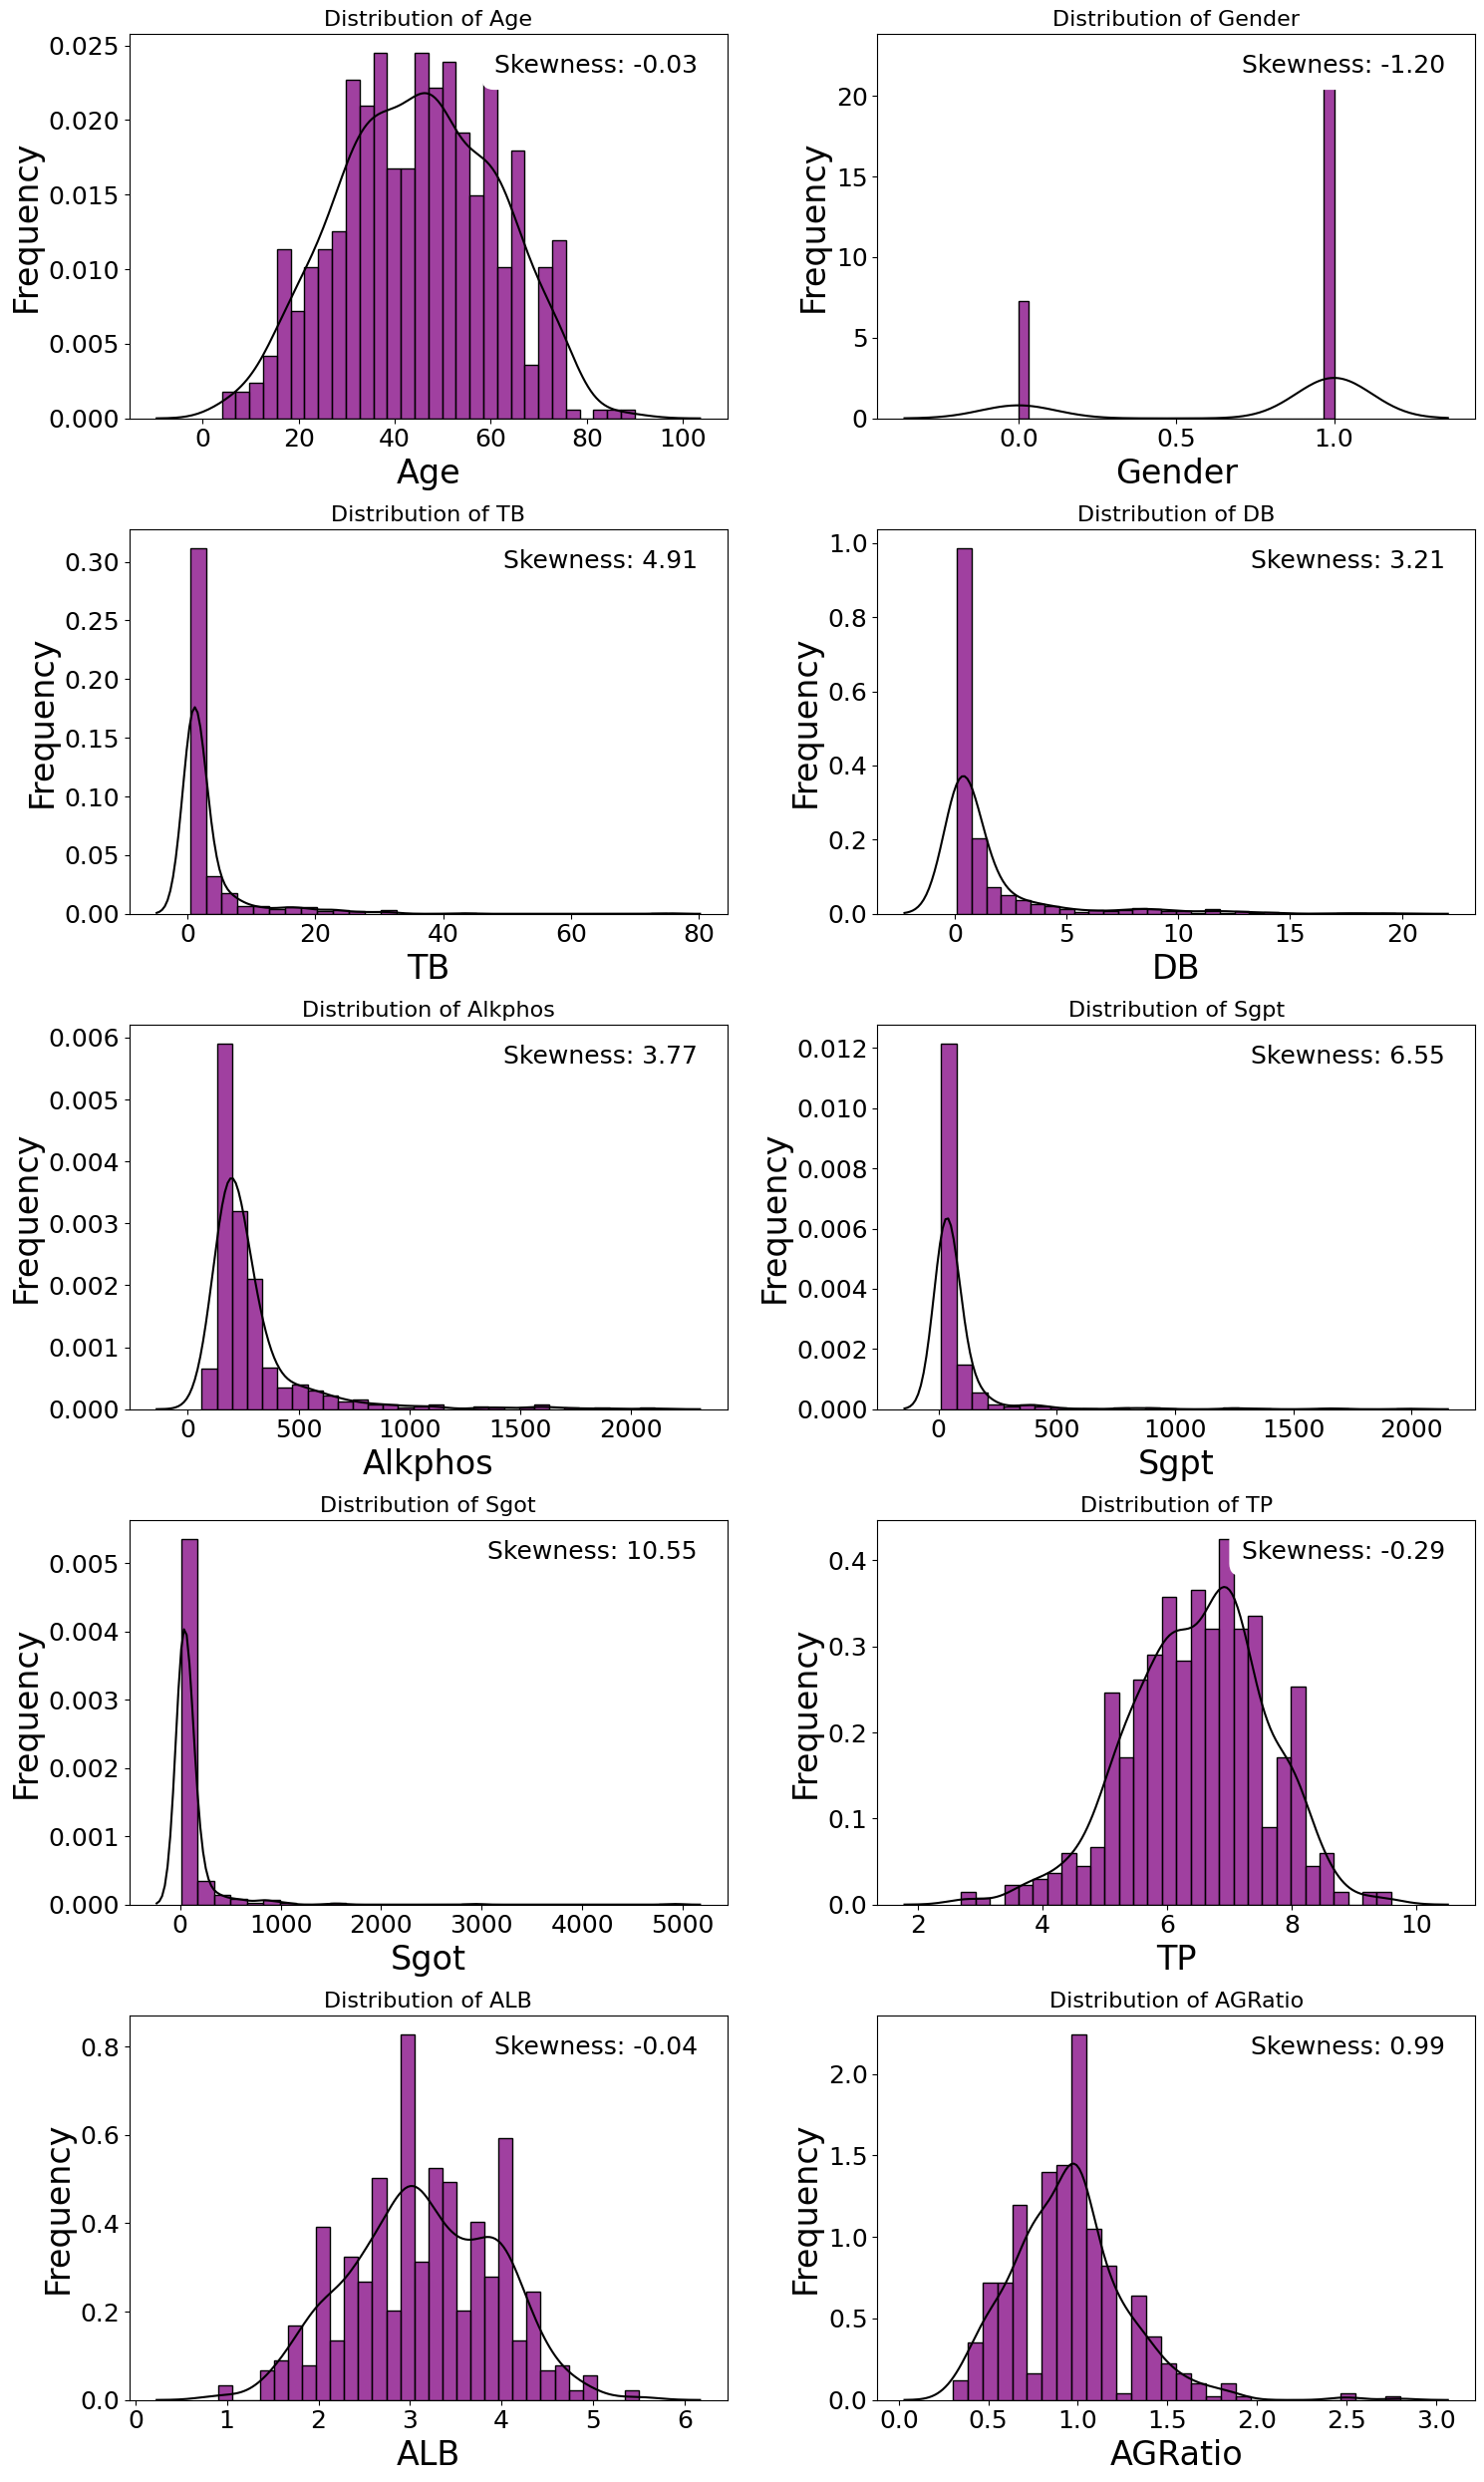

In [ ]:
plot_dataframe_distributions(df_polinomial, nrows=5, ncols=2, title_fontsize=16, axis_fontsize=24, tick_fontsize=18, color='purple')

In [ ]:
df_polinomial.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AGRatio', 'Selector'],
      dtype='object')

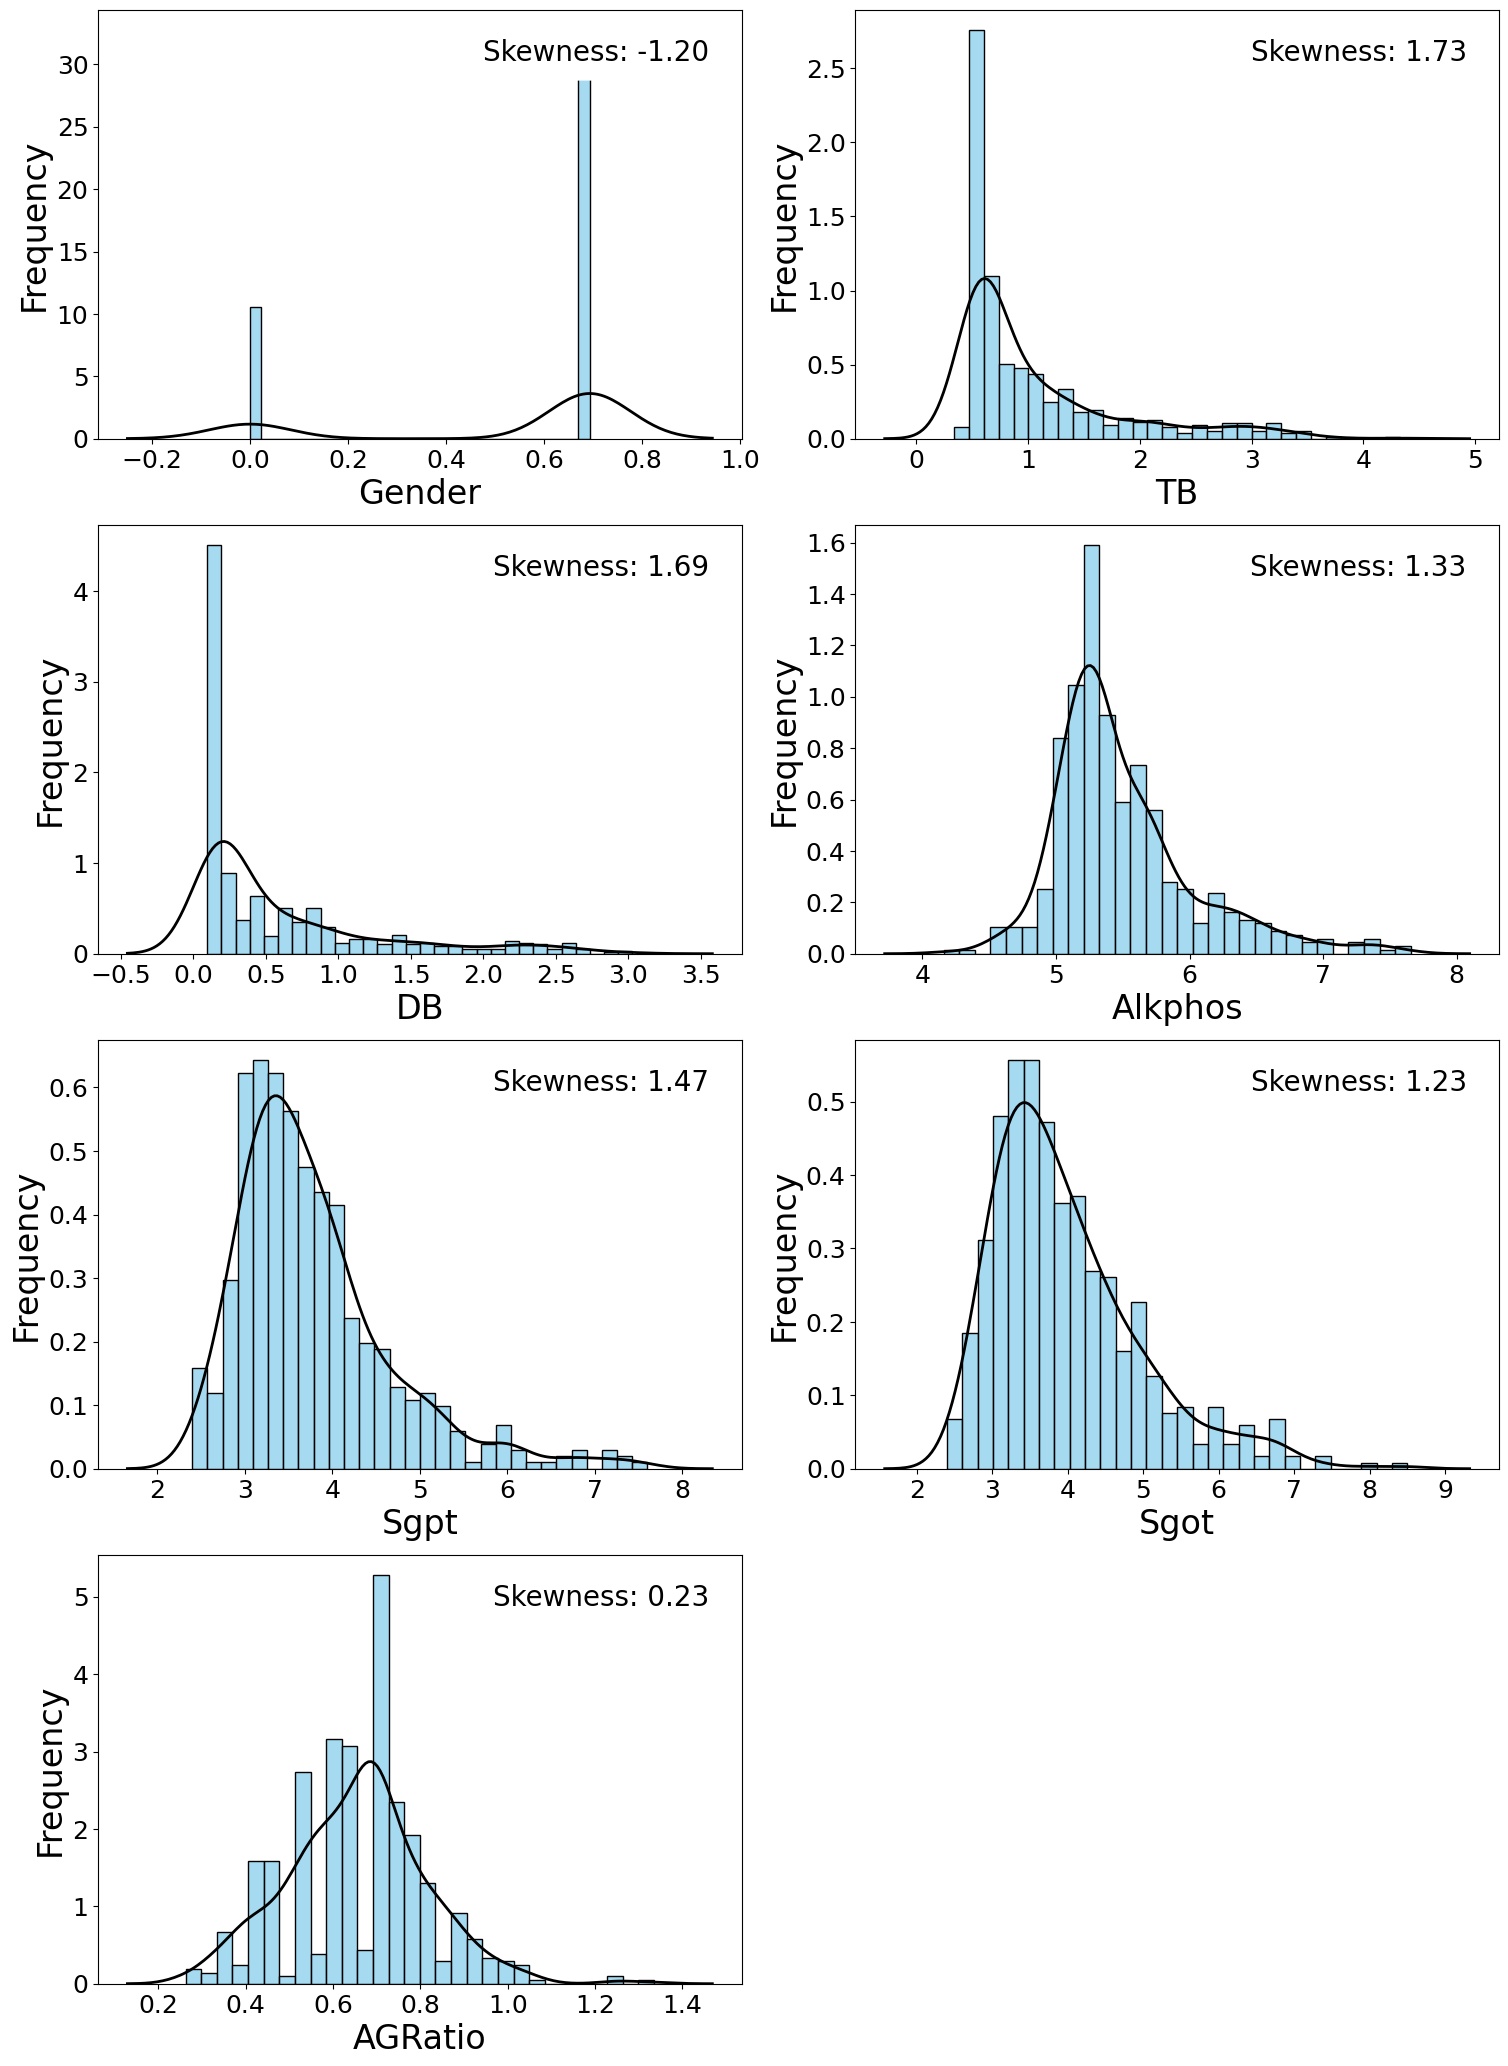

In [ ]:
df_polinomial_copy = df_polinomial.copy()
skewed_cols = ['Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'AGRatio']

plt.figure(figsize=(15, 25))

colors = {
    'sgpt': '#5AD5D4',
    'tb': '#5AD5D4'
}

for i, c in enumerate(skewed_cols):
    plt.subplot(5, 2, i + 1)

    if pd.api.types.is_numeric_dtype(df_polinomial_copy[c]):
        transformed_data = df_polinomial_copy[c].apply(np.log1p)
        color = colors.get(c, 'skyblue')

        sns.histplot(transformed_data, color=color, kde=False, bins=30, stat='density')
        sns.kdeplot(transformed_data, color='black', linewidth=2)

        skewness_after = transformed_data.skew()

        plt.text(0.95, 0.9, f'Skewness: {skewness_after:.2f}',
                 horizontalalignment='right', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=20, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))
    else:
        sns.histplot(df_polinomial_copy[c], kde=False, color='skyblue')

    #plt.title(f'Distribution plot for field: {c}', fontsize=16)
    plt.xlabel(c, fontsize=24)
    plt.ylabel('Frequency', fontsize=24)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

#Save o skewed coluns com log1p
for c in skewed_cols:
    df_polinomial_copy[c] = df_polinomial_copy[c].apply('log1p')

# Diminuição de dimensionalidade (Correlation Matrix)

In [ ]:
preprocessed = df_polinomial_copy.copy()
preprocessed.corr().style.background_gradient(cmap='viridis')

<Figure size 1000x800 with 0 Axes>

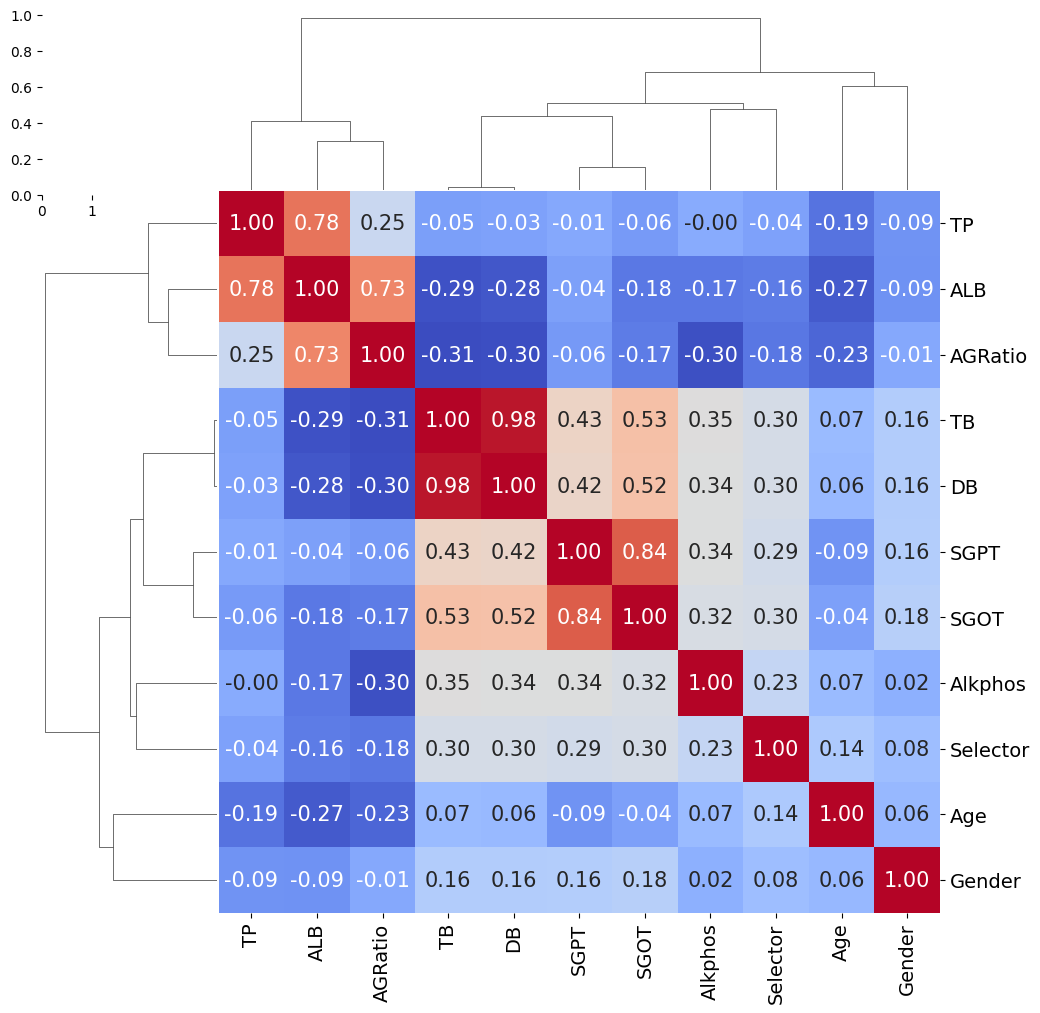

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_polinomial_copy = df_polinomial_copy.rename(columns={"Sgpt":"SGPT","Sgot":"SGOT"})

columns = df_polinomial_copy.columns.tolist()
if 'Selector' in columns:
    columns.remove('Selector')
    columns.append('Selector')
    df_polinomial_copy = df_polinomial_copy[columns]

correlation_matrix = df_polinomial_copy.corr()

correlation_matrix = correlation_matrix.reindex(columns, axis=0).reindex(columns, axis=1)

plt.figure(figsize=(10, 8))
clustermap = sns.clustermap(correlation_matrix, annot=True, fmt='.2f', annot_kws={"size": 15}, cbar=False, cmap="coolwarm")
clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xmajorticklabels(), fontsize = 14)
clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_ymajorticklabels(), fontsize = 14)
plt.show()

In [ ]:
features_list = ['DB', 'Age', 'Gender', 'Alkphos', 'Sgot', 'ALB', 'AGRatio']
df_preprocessed = preprocessed[features_list]

# Feature Selection

In [ ]:
df_features_result = pd.DataFrame(columns=['Feature'])
df_features_result['Feature']= features_list

In [ ]:
df_featureSelection = df_preprocessed.copy()
#df_featureSelection = df_featureSelection.drop(columns="Selector")
df_selector_featureSelection = df_selector.copy()

# Suponha que df é o seu DataFrame e target é a coluna alvo
X = df_featureSelection
y = df_selector_featureSelection

## Não Linear

### Random Forests (Embedded Method)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

model = RandomForestClassifier()
model.fit(X, y)

# Importância das características
importances = model.feature_importances_

# Criar um DataFrame para visualizar as importâncias
feature_importances = pd.DataFrame({'Feature': X.columns, 'RF': importances})
feature_importances = feature_importances.sort_values(by='RF', ascending=False)

df_features_result = df_features_result.merge(feature_importances,  left_on='Feature', right_on='Feature')
print(feature_importances)

   Feature        RF
3  Alkphos  0.202737
4     Sgot  0.196311
1      Age  0.186164
5      ALB  0.142005
0       DB  0.129269
6  AGRatio  0.115342
2   Gender  0.028172


### Gradient Boosting (Embedded Method)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X, y)

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Gradiente': importances})
feature_importances = feature_importances.sort_values(by='Gradiente', ascending=False)

df_features_result = df_features_result.merge(feature_importances,  left_on='Feature', right_on='Feature')

print(feature_importances)

   Feature  Gradiente
1      Age   0.257366
3  Alkphos   0.230722
0       DB   0.180197
4     Sgot   0.149954
5      ALB   0.107289
6  AGRatio   0.061195
2   Gender   0.013278


### Recursive Feature Elimination with Cross-Validation (RFECV)

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

model = SVC(kernel='linear')
rfecv = RFECV(estimator=model, step=1, min_features_to_select=4 ,cv=10, scoring='accuracy')
rfecv.fit(X, y)

#df_features_result = df_features_result.merge(feature_importances,  left_on='Feature', right_on='Feature')

print("Número ótimo de características: %d" % rfecv.n_features_)
print("Características selecionadas: %s" % list(X.columns[rfecv.support_]))

Número ótimo de características: 4
Características selecionadas: ['DB', 'Alkphos', 'ALB', 'AGRatio']


* Resultado com CV 10 e Min 3 = GENDER, ALB e AGRATIO
* Resultado com CV 10 e Min 4 = GENDER, ALB, AGRATIO, ALKPHOS

In [ ]:
df_features_result['RFECV_Linear'] = df_features_result['Feature'].isin(list(X.columns[rfecv.support_]))
print(df_features_result)

   Feature        RF  Gradiente  RFECV_Linear
0       DB  0.129269   0.180197          True
1      Age  0.186164   0.257366         False
2   Gender  0.028172   0.013278         False
3  Alkphos  0.202737   0.230722          True
4     Sgot  0.196311   0.149954         False
5      ALB  0.142005   0.107289          True
6  AGRatio  0.115342   0.061195          True


RFECV com Kernel não Linear

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define o modelo SVC com kernel RBF (não linear)
model = RandomForestClassifier()

# Configura o RFECV para selecionar características usando validação cruzada
rfecv = RFECV(estimator=model, step=1, min_features_to_select=1 ,cv=10, scoring='accuracy')

# Ajusta o RFECV ao conjunto de dados
rfecv.fit(X, y)

print("Número ótimo de características: %d" % rfecv.n_features_)
print("Características selecionadas: %s" % list(X.columns[rfecv.support_]))

df_features_result['RFECV_NoLienar'] = df_features_result['Feature'].isin(list(X.columns[rfecv.support_]))
print(df_features_result)

Número ótimo de características: 7
Características selecionadas: ['DB', 'Age', 'Gender', 'Alkphos', 'Sgot', 'ALB', 'AGRatio']
   Feature        RF  Gradiente  RFECV_Linear  RFECV_NoLienar
0       DB  0.129269   0.180197          True            True
1      Age  0.186164   0.257366         False            True
2   Gender  0.028172   0.013278         False            True
3  Alkphos  0.202737   0.230722          True            True
4     Sgot  0.196311   0.149954         False            True
5      ALB  0.142005   0.107289          True            True
6  AGRatio  0.115342   0.061195          True            True


### Feature Selection with Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'MutualInformation': mi})
feature_importances = feature_importances.sort_values(by='MutualInformation', ascending=False)

df_features_result = df_features_result.merge(feature_importances,  left_on='Feature', right_on='Feature')

print(feature_importances)

   Feature  MutualInformation
4     Sgot           0.079676
1      Age           0.061237
0       DB           0.048166
3  Alkphos           0.033362
5      ALB           0.032584
6  AGRatio           0.011688
2   Gender           0.001097


In [ ]:
df_features_result

Feature        RF  Gradiente  RFECV_Linear  RFECV_NoLienar  \
0       DB  0.129269   0.180197          True            True   
1      Age  0.186164   0.257366         False            True   
2   Gender  0.028172   0.013278         False            True   
3  Alkphos  0.202737   0.230722          True            True   
4     Sgot  0.196311   0.149954         False            True   
5      ALB  0.142005   0.107289          True            True   
6  AGRatio  0.115342   0.061195          True            True   

   MutualInformation  
0           0.048166  
1           0.061237  
2           0.001097  
3           0.033362  
4           0.079676  
5           0.032584  
6           0.011688

## Não Paramétricos

In [ ]:
df_features_result_non_parametrics = pd.DataFrame(columns=['Feature'])
df_features_result_non_parametrics['Feature']= features_list

### SelectKBest com teste de qui-quadrado (Chi-Square Test):
Esse método é usado para características categóricas e mede a independência entre características e a variável alvo.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Aplicar SelectKBest com Chi-Square
chi2_selector = SelectKBest(chi2, k='all')
X_kbest = chi2_selector.fit_transform(X, y)

# Obter scores
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

# Criar um DataFrame para visualizar os scores
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2_Score': chi2_scores, 'p-value': chi2_pvalues})
chi2_results = chi2_results.sort_values(by='Chi2_Score', ascending=False)

chi2_results_used = chi2_results[['Feature','Chi2_Score']]
df_features_result_non_parametrics = df_features_result_non_parametrics.merge(chi2_results_used,  left_on='Feature', right_on='Feature')

print(chi2_results)

   Feature  Chi2_Score       p-value
1      Age   64.315174  1.060260e-15
0       DB   38.095192  6.737594e-10
4     Sgot   12.741645  3.576029e-04
5      ALB    3.053371  8.056974e-02
3  Alkphos    1.587501  2.076835e-01
6  AGRatio    0.709974  3.994523e-01
2   Gender    0.668553  4.135565e-01


### Mutual Information:
A informação mútua mede a dependência entre variáveis e pode captar relações não lineares

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)

mi_results = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_results = mi_results.sort_values(by='Mutual Information', ascending=False)

df_features_result_non_parametrics = df_features_result_non_parametrics.merge(mi_results,  left_on='Feature', right_on='Feature')

print(mi_results)

   Feature  Mutual Information
0       DB            0.058073
1      Age            0.049383
4     Sgot            0.046803
3  Alkphos            0.030327
5      ALB            0.027510
6  AGRatio            0.008445
2   Gender            0.003570


### ANOVA F-test:
Embora o F-test seja um teste paramétrico, ele pode ser usado em combinação com métodos não paramétricos para seleção de características.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

f_selector = SelectKBest(f_classif, k='all')
X_kbest = f_selector.fit_transform(X, y)

f_scores = f_selector.scores_
f_pvalues = f_selector.pvalues_

f_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': f_pvalues})
f_results = f_results.sort_values(by='F-Score', ascending=False)

f_results_used = f_results[['Feature','F-Score']]

df_features_result_non_parametrics = df_features_result_non_parametrics.merge(f_results_used,  left_on='Feature', right_on='Feature')

print(f_results)

   Feature    F-Score       p-value
0       DB  59.060199  6.547909e-14
4     Sgot  57.865211  1.137000e-13
3  Alkphos  33.253476  1.315042e-08
6  AGRatio  18.958305  1.579097e-05
5      ALB  15.537431  9.074361e-05
1      Age  11.171429  8.840632e-04
2   Gender   3.973363  4.669253e-02


### Tree-based feature selection (Embedded Method):
Árvores de decisão e florestas aleatórias podem ser usadas para calcular a importância das características.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

importances = rf_model.feature_importances_

rf_results = pd.DataFrame({'Feature': X.columns, 'Random_Forest': importances})
rf_results = rf_results.sort_values(by='Random_Forest', ascending=False)

df_features_result_non_parametrics = df_features_result_non_parametrics.merge(rf_results,  left_on='Feature', right_on='Feature')

print(rf_results)

   Feature  Random_Forest
3  Alkphos       0.207611
4     Sgot       0.190691
1      Age       0.170111
5      ALB       0.140607
0       DB       0.140048
6  AGRatio       0.120325
2   Gender       0.030606


### Recursive Feature Elimination (RFECV) com Modelos Não Paramétricos:
RFE pode ser combinado com modelos não paramétricos, como árvores de decisão ou máquinas de vetores de suporte com kernel não linear.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rfe_selector = RFE(estimator=rf_model, n_features_to_select=3, step=1)
rfe_selector = rfe_selector.fit(X, y)

rfe_support = rfe_selector.support_
rfe_ranking = rfe_selector.ranking_

rfe_results = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe_ranking, 'RFE_Parametric': rfe_support})
rfe_results = rfe_results.sort_values(by='Ranking')

rfe_results_used = rfe_results[['Feature','RFE_Parametric']]

df_features_result_non_parametrics = df_features_result_non_parametrics.merge(rfe_results_used,  left_on='Feature', right_on='Feature')

print(rfe_results)

   Feature  Ranking  RFE_Parametric
1      Age        1            True
3  Alkphos        1            True
4     Sgot        1            True
5      ALB        2           False
0       DB        3           False
6  AGRatio        4           False
2   Gender        5           False


In [ ]:
df_features_result.to_excel('FeatureSelectionNonLinear.xlsx')
df_features_result_non_parametrics.to_excel('FeatureSelectionNonParametrics.xlsx')

# Modelo de Votação

Para o Não Paramétrico

In [ ]:
# Ordenar as colunas de scores para ranking
df_features_result_non_parametrics['Chi2_Rank'] = df_features_result_non_parametrics['Chi2_Score'].rank(ascending=True)
df_features_result_non_parametrics['Mutual_Info_Rank'] = df_features_result_non_parametrics['Mutual Information'].rank(ascending=True)
df_features_result_non_parametrics['F_Rank'] = df_features_result_non_parametrics['F-Score'].rank(ascending=True)
df_features_result_non_parametrics['Random_Forest_Rank'] = df_features_result_non_parametrics['Random_Forest'].rank(ascending=True)

# Converter RFE_Parametric de booleano para pontos: True = 1, False = 0
df_features_result_non_parametrics['RFE_Rank'] = df_features_result_non_parametrics['RFE_Parametric'].apply(lambda x: 1 if x else 0)

# Calcular a pontuação total somando as colunas de ranking
df_features_result_non_parametrics['Total_Score'] = df_features_result_non_parametrics[['Chi2_Rank', 'Mutual_Info_Rank', 'F_Rank', 'Random_Forest_Rank', 'RFE_Rank']].sum(axis=1)

# Ordenar o DataFrame pelas pontuações totais e selecionar as três melhores features
top_features = df_features_result_non_parametrics.sort_values(by='Total_Score', ascending=False).head(4)

print(top_features[['Feature', 'Total_Score']])

   Feature  Total_Score
0       DB         23.0
4     Sgot         23.0
1      Age         21.0
3  Alkphos         20.0


# RFECV com Vários modelos

## Com a normalização MinMaxScaler

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification

#List of models to be tested
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'Perceptron': Perceptron(max_iter=1000, random_state=42)

results = pd.DataFrame(columns=['Feature'])

results['Feature'] = X.columns

for model_name, model in models.items():
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    rfecv = RFECV(estimator=model, step=1, min_features_to_select=3, cv=10, scoring='accuracy')

    rfecv.fit(X_scaled, y)

    results[model_name] = (rfecv.support_).astype(int)

print(results)


A saída de streaming foi truncada nas últimas 5000 linhas.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [ ]:
results['Total'] = results.iloc[:, 1:].sum(axis=1)
results.sort_values(by='Total', ascending=False)

Feature  DecisionTree  RandomForest  GradientBoosting  XGBoost  LightGBM  \
1      Age             1             1                 1        1         1   
3  Alkphos             1             1                 1        1         1   
0       DB             1             1                 1        1         0   
4     Sgot             0             1                 1        0         1   
5      ALB             1             1                 1        1         0   
6  AGRatio             1             1                 1        1         0   
2   Gender             0             1                 0        1         0   

   Perceptron  Total  
1           1      6  
3           1      6  
0           1      5  
4           1      4  
5           0      4  
6           0      4  
2           0      2

Salvar os resultados

In [ ]:
#Save
results.to_excel('FeatureSelectionRFECV.xlsx')

# Valor de K

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

columns = ['Age', 'Alkphos', 'DB', 'Selector']
df_fuzzy = preprocessed[columns]
df_fuzzy = df_fuzzy[df_fuzzy['Selector'] == 1]
df_fuzzy.reset_index(drop=True, inplace=True)
df_fuzzy.drop(columns=['Selector'], inplace=True)

X = df_fuzzy

davies_bouldin_scores = []
silhouette_scores = []
calinski_harabasz_scores = []

min_clusters = 2
max_clusters = 10

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, n_init= 10 ,random_state=42)

    kmeans.fit(X)

    davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
    davies_bouldin_scores.append(davies_bouldin)


    calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabasz_scores.append(calinski_harabasz)

    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

optimal_num_clusters = davies_bouldin_scores.index(min(davies_bouldin_scores)) + min_clusters
print(f"O número David_boulin é: {optimal_num_clusters}")

optimal_num_clusters = calinski_harabasz_scores.index(max(calinski_harabasz_scores)) + min_clusters
print(f"O número Calinski é: {optimal_num_clusters}")

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + min_clusters
print(f"O número Silhouette é: {optimal_num_clusters}")

O número David_boulin é: 6
O número Calinski é: 10
O número Silhouette é: 2


# Fuzzy c-means

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import skfuzzy as fuzz

columns = ['Age', 'Alkphos', 'DB', 'Selector']
df_fuzzy = preprocessed[columns]
df_fuzzy = df_fuzzy[df_fuzzy['Selector'] == 1]
df_fuzzy.reset_index(drop=True, inplace=True)
df_fuzzy.drop(columns=['Selector'], inplace=True)

scaler = MinMaxScaler()
scaled_features = {}
scalers = {}
for column in df_fuzzy.columns:
    col_scaler = MinMaxScaler()
    scaled_features[column] = col_scaler.fit_transform(df_fuzzy[[column]]).flatten()
    scalers[column] = col_scaler

df_scaled = pd.DataFrame(scaled_features)
n_clusters = 6
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    df_scaled.T,
    c=n_clusters,
    m=2,
    error=0.005,
    maxiter=1000,
    init=None
)

cluster_membership = np.argmax(u, axis=0)
df_fuzzy['Cluster'] = cluster_membership

print(df_fuzzy)

     Age   Alkphos        DB  Cluster
0     65  5.236442  0.095310        1
1     62  6.551080  1.871802        0
2     62  6.196444  1.629241        0
3     58  5.209486  0.336472        1
4     72  5.278115  1.098612        1
..   ...       ...       ...      ...
411   32  5.669881  2.219203        5
412   32  5.252273  2.240710        5
413   40  4.595120  0.095310        2
414   52  5.505332  0.182322        2
415   31  5.220356  0.405465        4

[416 rows x 4 columns]


Reverte os **centroides** para antes da normalização e do Log_Natural

In [ ]:
cntr

array([[0.6101471 , 0.6027811 , 0.46386413],
       [0.71435658, 0.3412618 , 0.08167685],
       [0.4841842 , 0.33423517, 0.05431624],
       [0.4509221 , 0.43477548, 0.27822626],
       [0.25285555, 0.34534374, 0.05498859],
       [0.40104467, 0.42914998, 0.7425511 ]])

In [ ]:
cntr_original = np.zeros_like(cntr)
for i, column in enumerate(df_scaled.columns):
    cntr_original[:, i] = scalers[column].inverse_transform(cntr[:, i].reshape(-1, 1)).flatten()

df_centroid = pd.DataFrame(cntr_original, columns=df_fuzzy.columns[:-1])
df_centroid.index.name = 'Cluster'
df_centroid.reset_index(inplace=True)

In [ ]:
colunms_list = ['Alkphos', 'DB']
for c in colunms_list:
    df_centroid[c] = df_centroid[c].apply(np.expm1)

Reverte os **dados** para antes do Log_Natural

In [ ]:
colunms_list = ['Alkphos', 'DB']
for c in colunms_list:
    df_fuzzy[c] = df_fuzzy[c].apply(np.expm1)

In [ ]:
df_fuzzy.to_excel('fuzzy.xlsx')
df_centroid.to_excel('centroid.xlsx')

## Plote normalizado

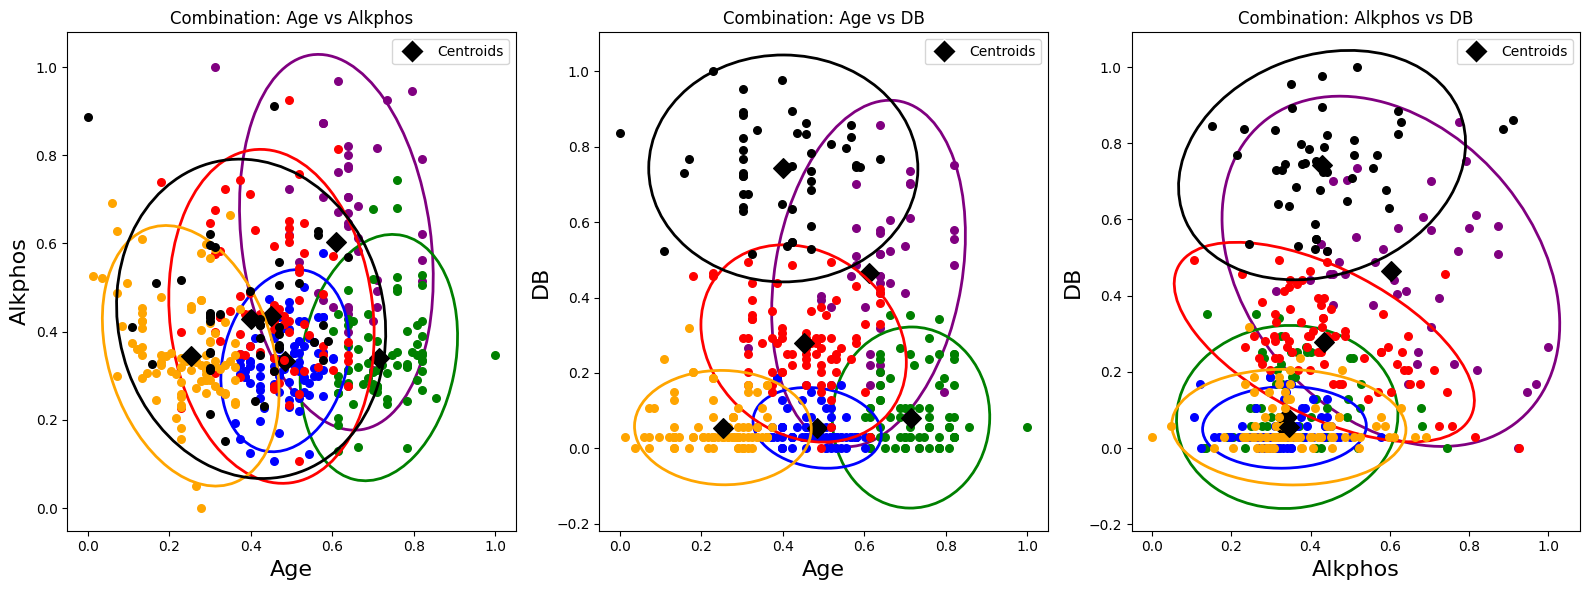

In [ ]:
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes = axes.ravel()

combinations = [(0, 1), (0, 2), (1, 2)]

colors = ['purple', 'green', 'blue', 'red', 'orange', 'black', "yellow","brown","gray","cyan"]

for i, (x_index, y_index) in enumerate(combinations):
    ax = axes[i]

    for j in range(n_clusters):
        cluster_data = df_scaled.loc[df_fuzzy['Cluster'] == j, [df_scaled.columns[x_index], df_scaled.columns[y_index]]].values
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=30, label=f'Cluster {j}', color=colors[j])

        ax.scatter(cntr[j, x_index], cntr[j, y_index], marker='D', color='black', s=100)

        cluster_center = cntr[j, [x_index, y_index]]
        cluster_data = df_scaled.loc[df_fuzzy['Cluster'] == j, [df_scaled.columns[x_index], df_scaled.columns[y_index]]].values
        cov_matrix = np.cov(cluster_data.T)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        order = eigenvalues.argsort()[::-1]
        eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

        color = colors[j]
        ell = Ellipse(xy=cluster_center,
                      width=2 * np.sqrt(5.991 * eigenvalues[0]),
                      height=2 * np.sqrt(5.991 * eigenvalues[1]),
                      angle=angle,
                      edgecolor=color,
                      lw=2,
                      fill=False)
        ax.add_patch(ell)

    legend_elements = [
        Line2D([0], [0], marker='D', color='w', markerfacecolor='black', markersize=12, label='Centroids'),
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    ax.set_title(f'Combination: {columns[x_index]} vs {columns[y_index]}')
    ax.set_xlabel(columns[x_index], fontsize=16)
    ax.set_ylabel(columns[y_index], fontsize=16)

plt.tight_layout()
plt.show()

## Not standardized

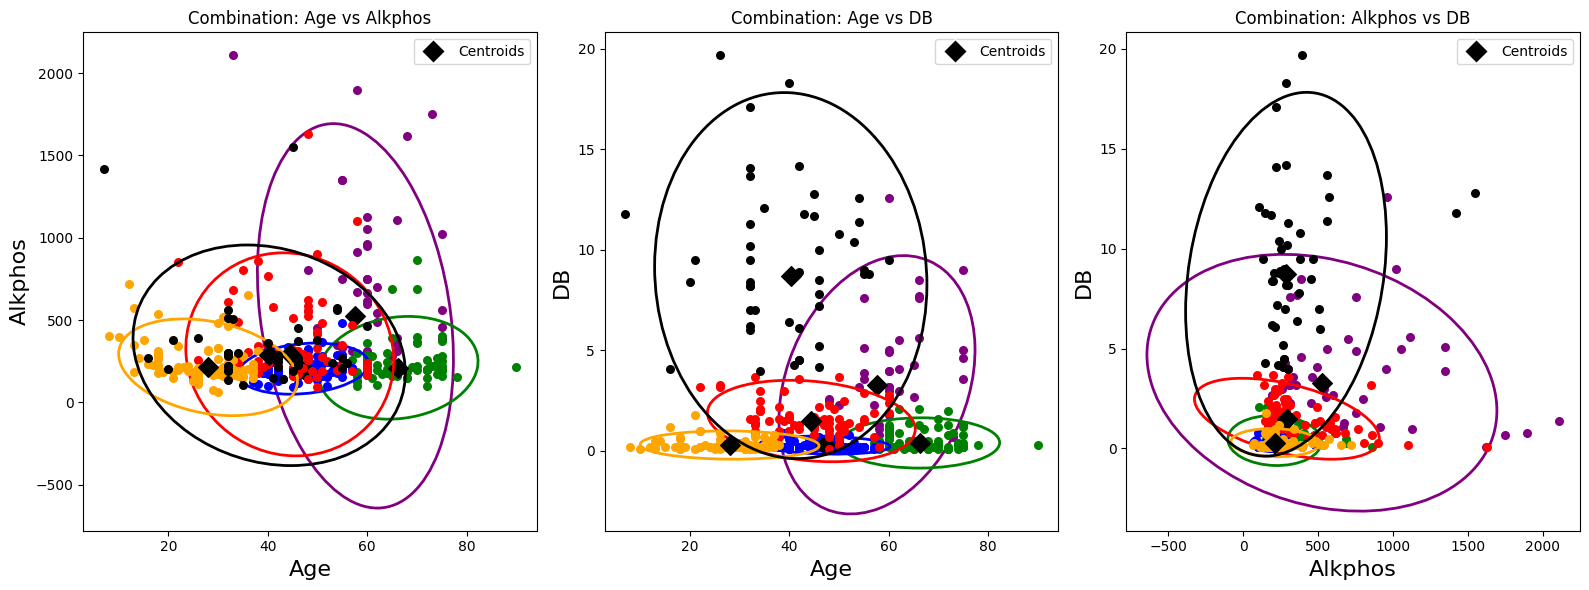

In [ ]:
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D
columns = ['Age', 'Alkphos', 'DB']

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes = axes.ravel()

combinations = [(0, 1), (0, 2), (1, 2)]

colors = ['purple', 'green', 'blue', 'red', 'orange', 'black', "yellow","brown","gray","cyan"]

for i, (x_index, y_index) in enumerate(combinations):
    ax = axes[i]


    for j in range(n_clusters):
          cluster_data = df_fuzzy.loc[df_fuzzy['Cluster'] == j, [df_fuzzy.columns[x_index], df_fuzzy.columns[y_index]]].values
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=30, label=f'Cluster {j}', color=colors[j])

        centroid_x = df_centroid.loc[df_centroid['Cluster'] == j, columns[x_index]].values[0]
        centroid_y = df_centroid.loc[df_centroid['Cluster'] == j, columns[y_index]].values[0]
        ax.scatter(centroid_x, centroid_y, marker='D', color='black', s=100)

        cov_matrix = np.cov(cluster_data.T)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        order = eigenvalues.argsort()[::-1]
        eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
        angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

        color = colors[j]
        ell = Ellipse(xy=(centroid_x, centroid_y),
                      width=2 * np.sqrt(5.991 * eigenvalues[0]),
                      height=2 * np.sqrt(5.991 * eigenvalues[1]),
                      angle=angle,
                      edgecolor=color,
                      lw=2,
                      fill=False)
        ax.add_patch(ell)

    legend_elements = [
        Line2D([0], [0], marker='D', color='w', markerfacecolor='black', markersize=12, label='Centroids'),
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    ax.set_title(f'Combination: {columns[x_index]} vs {columns[y_index]}')
    ax.set_xlabel(columns[x_index], fontsize=16)
    ax.set_ylabel(columns[y_index], fontsize=16)

plt.tight_layout()
plt.show()

### Tabela de Pertinência

In [ ]:
pertinence_to_others = pd.DataFrame(columns=[f'Cluster {i+1}' for i in range(n_clusters)])
for i in range(n_clusters):
    pertinence_to_others[f'Cluster {i+1}'] = u[i]

print("Pertinence to Other Clusters:")
print(pertinence_to_others)
pertinence_to_others.to_excel('pertinence_clusters.xlsx')

Pertinence to Other Clusters:
     Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  Cluster 6
0     0.020027   0.775044   0.124869   0.040061   0.030522   0.009477
1     0.658196   0.049056   0.042259   0.090412   0.033046   0.127031
2     0.861099   0.022287   0.018192   0.045014   0.012852   0.040556
3     0.025627   0.521931   0.321722   0.073017   0.045508   0.012195
4     0.194302   0.332474   0.140656   0.189944   0.066538   0.076087
..         ...        ...        ...        ...        ...        ...
411   0.046315   0.015047   0.018111   0.040274   0.019462   0.860793
412   0.070801   0.029952   0.036120   0.073316   0.038588   0.751223
413   0.042665   0.135539   0.383951   0.118265   0.287196   0.032384
414   0.019515   0.136933   0.715393   0.064674   0.054629   0.008855
415   0.013775   0.024178   0.106207   0.060423   0.785230   0.010186

[416 rows x 6 columns]


### Plot 3D Puro

In [ ]:
import pandas as pd
import plotly.graph_objects as go

colors = ['purple', 'green', 'blue', 'red', 'orange', 'black', "yellow","brown","gray","cyan"]

fig = go.Figure()

for j in range(df_centroid['Cluster'].nunique()):
    cluster_data = df_fuzzy[df_fuzzy['Cluster'] == j]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Alkphos'],
        z=cluster_data['DB'],
        mode='markers',
        marker=dict(size=5, color=colors[j], opacity=0.8),
        name=f'Cluster {j}'
    ))

fig.add_trace(go.Scatter3d(
    x=df_centroid['Age'],
    y=df_centroid['Alkphos'],
    z=df_centroid['DB'],
    mode='markers',
    marker=dict(size=10, color='black', symbol='diamond'),
    name='Centroids'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Alkphos',
        zaxis_title='DB'
    ),
    title='3D Cluster Plot with Centroids',
    legend=dict(x=0.9, y=0.9)
)

fig.show()


### Plot 3D Preenchido Esfera

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

colors = ['purple', 'green', 'blue', 'red', 'orange', 'black', "yellow","brown","gray","cyan"]

fig = go.Figure()

for j in range(df_centroid['Cluster'].nunique()):
    cluster_data = df_fuzzy[df_fuzzy['Cluster'] == j]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Alkphos'],
        z=cluster_data['DB'],
        mode='markers',
        marker=dict(size=5, color=colors[j], opacity=0.8),
        name=f'Cluster {j}'
    ))
    std_dev = cluster_data[['Age', 'Alkphos', 'DB']].std()
    radius = 3 * std_dev

    centroid = df_centroid.loc[df_centroid['Cluster'] == j, ['Age', 'Alkphos', 'DB']].values[0]

    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = centroid[0] + radius[0] * np.cos(u) * np.sin(v)
    y = centroid[1] + radius[1] * np.sin(u) * np.sin(v)
    z = centroid[2] + radius[2] * np.cos(v)

    fig.add_trace(go.Surface(
        x=x, y=y, z=z,
        colorscale=[[0, colors[j]], [1, colors[j]]],
        opacity=0.2,
        showscale=False
    ))

fig.add_trace(go.Scatter3d(
    x=df_centroid['Age'],
    y=df_centroid['Alkphos'],
    z=df_centroid['DB'],
    mode='markers',
    marker=dict(size=10, color='black', symbol='diamond'),
    name='Centroids'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Alkphos',
        zaxis_title='DB'
    ),
    title='3D Cluster Plot with Spheres',
    legend=dict(x=0.9, y=0.9)
)

fig.show()


### Plote 3D Com raios

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

colors = ['purple', 'green', 'blue', 'red', 'orange', 'black', "yellow","brown","gray","cyan"]

fig = go.Figure()

for j in range(df_centroid['Cluster'].nunique()):
    cluster_data = df_fuzzy[df_fuzzy['Cluster'] == j]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Alkphos'],
        z=cluster_data['DB'],
        mode='markers',
        marker=dict(size=5, color=colors[j], opacity=0.8),
        name=f'Cluster {j}'
    ))

    std_dev = cluster_data[['Age', 'Alkphos', 'DB']].std()
    radius = 3 * std_dev

    centroid = df_centroid.loc[df_centroid['Cluster'] == j, ['Age', 'Alkphos', 'DB']].values[0]

    num_lines = 20
    angles = np.linspace(0, 2 * np.pi, num_lines)

    for angle in angles:
        t = np.linspace(0, 2 * np.pi, 100)

        x_xy = centroid[0] + radius[0] * np.cos(t) * np.cos(angle)
        y_xy = centroid[1] + radius[1] * np.sin(t) * np.cos(angle)
        z_xy = np.full_like(t, centroid[2])


        x_xz = centroid[0] + radius[0] * np.cos(t) * np.cos(angle)
        y_xz = np.full_like(t, centroid[1])
        z_xz = centroid[2] + radius[2] * np.sin(t) * np.cos(angle)

         x_yz = np.full_like(t, centroid[0])
        y_yz = centroid[1] + radius[1] * np.cos(t) * np.cos(angle)
        z_yz = centroid[2] + radius[2] * np.sin(t) * np.cos(angle)

        fig.add_trace(go.Scatter3d(
            x=x_xy, y=y_xy, z=z_xy, mode='lines',
            line=dict(color=colors[j], width=1), showlegend=False
        ))
        fig.add_trace(go.Scatter3d(
            x=x_xz, y=y_xz, z=z_xz, mode='lines',
            line=dict(color=colors[j], width=1), showlegend=False
        ))
        fig.add_trace(go.Scatter3d(
            x=x_yz, y=y_yz, z=z_yz, mode='lines',
            line=dict(color=colors[j], width=1), showlegend=False
        ))

fig.add_trace(go.Scatter3d(
    x=df_centroid['Age'],
    y=df_centroid['Alkphos'],
    z=df_centroid['DB'],
    mode='markers',
    marker=dict(size=10, color='black', symbol='diamond'),
    name='Centroids'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Alkphos',
        zaxis_title='DB'
    ),
    title='3D Cluster Plot with Horizontal Radii',
    legend=dict(x=0.9, y=0.9)
)

fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

colors = ['blue', 'green', 'purple', 'red', 'orange', 'black']

fig = go.Figure()

highlighted_ids = [345, 368, 20, 305]

n_clusters = 4

for cluster in range(n_clusters):
    cluster_data = df_fuzzy[df_fuzzy['Cluster'] == cluster]

    if cluster_data.empty:
        print(f"Cluster {cluster} está vazio.")
        continue

    center = df_centroid.loc[df_centroid['Cluster'] == cluster, ['Age', 'Alkphos', 'DB']].values[0]

    fig.add_trace(go.Scatter3d(
        x=[center[0]],
        y=[center[1]],
        z=[center[2]],
        mode='markers',
        marker=dict(
            size=10,
            symbol='diamond',
            opacity=1,
            color='black'
        ),
        name=f'Centroid {cluster}',
    ))

    for index, row in cluster_data.iterrows():
        if index in highlighted_ids:
            fig.add_trace(go.Scatter3d(
                x=[row['Age']],
                y=[row['Alkphos']],
                z=[row['DB']],
                mode='markers',
                marker=dict(
                    size=14,
                    symbol='circle-open',
                    opacity=1,
                    color='black',
                    line=dict(width=6)
                ),
                name=f'Highlighted Point {index}',
            ))

    fig.add_trace(go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Alkphos'],
        z=cluster_data['DB'],
        mode='markers',
        marker=dict(
            size=6,
            color=colors[cluster],
            opacity=0.8
        ),
        name=f'Cluster {cluster}'
    ))

    cluster_center = cluster_data[['Age', 'Alkphos', 'DB']].mean()
    max_radius = cluster_data[['Age', 'Alkphos', 'DB']].std().max() * 0.03

    num_points = 100
    theta = np.linspace(0, 2 * np.pi, num_points)
    phi = np.linspace(0, np.pi, num_points)
    theta, phi = np.meshgrid(theta, phi)

    x = cluster_center['Age'] + max_radius * np.sin(phi) * np.cos(theta)
    y = cluster_center['Alkphos'] + max_radius * np.sin(phi) * np.sin(theta)
    z = cluster_center['DB'] + max_radius * np.cos(phi)

    fig.add_trace(go.Scatter3d(
        x=x.flatten(),
        y=y.flatten(),
        z=z.flatten(),
        mode='lines',
        line=dict(color=f'rgba(40,40,40,0.3)'),
        hoverinfo='none',
        showlegend=False
    ))

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Age', range=[df_fuzzy['Age'].min() - 10, df_fuzzy['Age'].max() + 10]),
        yaxis=dict(title='Alkphos', range=[df_fuzzy['Alkphos'].min() - 10, df_fuzzy['Alkphos'].max() + 10]),
        zaxis=dict(title='DB', range=[df_fuzzy['DB'].min() - 10, df_fuzzy['DB'].max() + 10])
    ),
    title='Clusters Difusos em 3D com Raios Menos Densos',
    showlegend=True
)

fig.show()


# Combination of results from paper OL2A24 and the new results obtained

The intention is to compare which ones are the most critical among both.





In [ ]:
import pandas as pd
dataOl2A= pd.read_excel('AllClustersINDEX_Novo.xlsx')
jornalOl2A= pd.read_excel('fuzzy.xlsx')

In [ ]:
jornalOl2A.drop(columns=['Unnamed: 0'], inplace=True)
dataOl2AColumns = dataOl2A[['Age','Alkphos','DB','Cluster Membership', 'IDS']].copy()

In [ ]:
dataOl2AColumns['IDS'] = dataOl2AColumns['IDS']-1

In [ ]:
dataOl2AColumns

Age  Alkphos   DB  Cluster Membership  IDS
0     65      187  0.1                   3    0
1     62      699  5.5                   0    1
2     62      490  4.1                   0    2
3     58      182  0.4                   3    3
4     72      195  2.0                   0    4
..   ...      ...  ...                 ...  ...
367   32      289  8.2                   1  411
368   32      190  8.4                   1  412
369   40       98  0.1                   3  413
370   52      245  0.2                   2  414
371   31      184  0.5                   3  415

[372 rows x 5 columns]

In [ ]:
jornalOl2A

Age  Alkphos   DB  Cluster
0     65    187.0  0.1        1
1     62    699.0  5.5        0
2     62    490.0  4.1        0
3     58    182.0  0.4        1
4     72    195.0  2.0        1
..   ...      ...  ...      ...
411   32    289.0  8.2        5
412   32    190.0  8.4        5
413   40     98.0  0.1        2
414   52    245.0  0.2        2
415   31    184.0  0.5        4

[416 rows x 4 columns]

In [ ]:
merged_df = pd.merge(jornalOl2A, dataOl2AColumns, left_index=True, right_on='IDS', how='left')

In [ ]:
merged_df.to_excel('teste.xlsx')

# Quartile ranking system

Take the merged_df file and place the values from the other columns of the Polynomial file, which are the ones prior to the log_N conversion.

In [ ]:
dados_quartiles = pd.read_excel('MergedExcel.xlsx')

In [ ]:
dados_quartiles.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
#dados_quartiles.drop(columns=['Cluster Conferencia'])

## Quartile based on 25% of the data

In [ ]:
# Func Alkphos
def score_alkphos(value):
    if 36 <= value <= 150:
        return 0
    elif value > 150:
        # Define quartiles for Alkphos above 150
        quartiles = pd.qcut(dados_quartiles[dados_quartiles['Alkphos'] > 150]['Alkphos'], q=4, labels=False) + 1
        return quartiles[dados_quartiles[dados_quartiles['Alkphos'] == value].index[0]]
    return np.nan

# Function to calculate the DB score
def score_db(value):
    if 0 <= value <= 5.1:
        return 0
    elif value > 5.1:
        # Set the quartiles for DB above 5.1
        quartiles = pd.qcut(dados_quartiles[dados_quartiles['DB'] > 5.1]['DB'], q=4, labels=False) + 1
        return quartiles[dados_quartiles[dados_quartiles['DB'] == value].index[0]]
    return np.nan

# Apply the functions to calculate the total score
dados_quartiles['Score_Alkphos'] = dados_quartiles['Alkphos'].apply(score_alkphos)
dados_quartiles['Score_DB'] = dados_quartiles['DB'].apply(score_db)

# Sum
dados_quartiles['Score'] = dados_quartiles[['Score_Alkphos', 'Score_DB']].sum(axis=1)

# Remover colunas intermediárias
#df = df.drop(columns=['Score_Alkphos', 'Score_DB'])

# Show quartile ranges for Alkphos
alkphos_above_150 = dados_quartiles[dados_quartiles['Alkphos'] > 150]['Alkphos']
alkphos_quartiles = pd.qcut(alkphos_above_150, q=4)
print("Intervalos dos Quartis para Alkphos acima de 150:")
print(alkphos_quartiles.value_counts().sort_index())

# Show quartile ranges for DB
db_above_5_1 = dados_quartiles[dados_quartiles['DB'] > 5.1]['DB']
db_quartiles = pd.qcut(db_above_5_1, q=4)
print("\nIntervalos dos Quartis para DB acima de 5.1:")
print(db_quartiles.value_counts().sort_index())

print(dados_quartiles)

Intervalos dos Quartis para Alkphos acima de 150:
Alkphos
(150.999, 194.75]    95
(194.75, 240.0]      96
(240.0, 340.5]       94
(340.5, 2110.0]      95
Name: count, dtype: int64

Intervalos dos Quartis para DB acima de 5.1:
DB
(5.199, 7.65]    12
(7.65, 9.0]      13
(9.0, 11.75]     10
(11.75, 19.7]    12
Name: count, dtype: int64
        ID  Age  Alkphos   DB  Cluster Jornal  Cluster Conferencia  \
0      4.0   72    195.0  2.0               5                  0.0   
1     87.0   66    159.0  2.1               5                  0.0   
2    306.0   62    103.0  2.1               5                  0.0   
3     35.0   42    272.0  4.5               3                  0.0   
4     36.0   42    272.0  4.5               3                  0.0   
..     ...  ...      ...  ...             ...                  ...   
411    NaN   60   1124.0  1.0               0                  NaN   
412    NaN   33   2110.0  1.4               0                  NaN   
413    NaN   55   1350.0  3.9      

## Quartil com base nos intervalos 25%

In [ ]:
#Function to calculate the Alkphos score based on fixed intervals
def score_alkphos_fixed(value, min_value, max_value):
    if 36 <= value <= 150:
        return 0
    elif value > 150:
        # Definir os intervalos dos quartis fixos
        range_interval = max_value - 150
        quartile_size = range_interval / 4
        if 150 < value <= 150 + quartile_size:
            return 1
        elif 150 + quartile_size < value <= 150 + 2 * quartile_size:
            return 2
        elif 150 + 2 * quartile_size < value <= 150 + 3 * quartile_size:
            return 3
        elif 150 + 3 * quartile_size < value <= max_value:
            return 4
    return np.nan  # Ignorar valores fora do intervalo

# Function to calculate DB score based on fixed intervals
def score_db_fixed(value, min_value, max_value):
    if 0 <= value <= 5.1:
        return 0
    elif value > 5.1:
        # Define the fixed quartile intervals
        range_interval = max_value - 5.1
        quartile_size = range_interval / 4
        if 5.1 < value <= 5.1 + quartile_size:
            return 1
        elif 5.1 + quartile_size < value <= 5.1 + 2 * quartile_size:
            return 2
        elif 5.1 + 2 * quartile_size < value <= 5.1 + 3 * quartile_size:
            return 3
        elif 5.1 + 3 * quartile_size < value <= max_value:
            return 4
    return np.nan  # Ignore values outside the range

# Function to calculate the ALB score based on fixed intervals
def score_alb_fixed(value, min_value, max_value):
    if value < 3.5:
        range_interval = 3.5 - min_value
        quartile_size = range_interval / 4
        if min_value <= value <= min_value + quartile_size:
            return 4
        elif min_value + quartile_size < value <= min_value + 2 * quartile_size:
            return 3
        elif min_value + 2 * quartile_size < value <= min_value + 3 * quartile_size:
            return 2
        elif min_value + 3 * quartile_size < value < 3.5:
            return 1
    elif 3.5 <= value <= 5.4:
        retur
    elif value > 5.4:
        return 1
        range_interval = max_value - 5.4
        quartile_size = range_interval / 4
        if 5.4 < value <= 5.4 + quartile_size:
            return 1
        elif 5.4 + quartile_size < value <= 5.4 + 2 * quartile_size:
            return 2
        elif 5.4 + 2 * quartile_size < value <= 5.4 + 3 * quartile_size:
            return 3
        elif 5.4 + 3 * quartile_size < value <= max_value:
            return 4
    return np.nan

# Function to calculate the Sgot (AST) score based on fixed intervals
def score_sgot_fixed(value, min_value, max_value):
    if value < 35:
        return 0
    elif value > 35:
        range_interval = max_value - 35
        quartile_size = range_interval / 4
        if 35 < value <= 35 + quartile_size:
            return 1
        elif 35 + quartile_size < value <= 35 + 2 * quartile_size:
            return 2
        elif 35 + 2 * quartile_size < value <= 35 + 3 * quartile_size:
            return 3
        elif 35 + 3 * quartile_size < value <= max_value:
            return 4
    return np.nan


def score_agratio_fixed(value, min_value, max_value):
    if value < 1.2:
        range_interval = 1.2 - min_value
        quartile_size = range_interval / 4
        if min_value <= value <= min_value + quartile_size:
            return 4
        elif min_value + quartile_size < value <= min_value + 2 * quartile_size:
            return 3
        elif min_value + 2 * quartile_size < value <= min_value + 3 * quartile_size:
            return 2
        elif min_value + 3 * quartile_size < value < 1.2:
            return 1
    elif 1.2 <= value <= 2:
        return 0
    elif value > 2:
        return 1
        range_interval = max_value - 2
        quartile_size = range_interval / 4
        if 5.4 < value <= 2 + quartile_size:
            return 1
        elif 5.4 + quartile_size < value <= 2 + 2 * quartile_size:
            return 2
        elif 5.4 + 2 * quartile_size < value <= 2 + 3 * quartile_size:
            return 3
        elif 5.4 + 3 * quartile_size < value <= max_value:
            return 4
    return np.nan

max_alkphos = dados_quartiles['Alkphos'].max()
max_db = dados_quartiles['DB'].max()
max_alb = dados_quartiles['ALB'].max()
min_alb = dados_quartiles['ALB'].min()
max_sgot = dados_quartiles['Sgot'].max()
max_agratio = dados_quartiles['AGRatio'].max()
min_agratio = dados_quartiles['AGRatio'].min()

dados_quartiles['Score_AGRatio'] = dados_quartiles['AGRatio'].apply(score_agratio_fixed, args=(min_agratio, max_agratio))
dados_quartiles['Score_Alkphos'] = dados_quartiles['Alkphos'].apply(score_alkphos_fixed, args=(150, max_alkphos))
dados_quartiles['Score_DB'] = dados_quartiles['DB'].apply(score_db_fixed, args=(5.1, max_db))
dados_quartiles['Score_ALB'] = dados_quartiles['ALB'].apply(score_alb_fixed, args=(min_alb, max_alb))
dados_quartiles['Score_Sgot'] = dados_quartiles['Sgot'].apply(score_sgot_fixed, args=(35, max_sgot))

dados_quartiles['Score'] = dados_quartiles[['Score_Alkphos', 'Score_DB', 'Score_ALB', 'Score_Sgot', 'Score_AGRatio']].sum(axis=1)

print(f"Intervalos dos Quartis para Alkphos acima de 150:")
print(f"Q1: 150 a {150 + (max_alkphos - 150) / 4}")
print(f"Q2: {150 + (max_alkphos - 150) / 4} a {150 + 2 * (max_alkphos - 150) / 4}")
print(f"Q3: {150 + 2 * (max_alkphos - 150) / 4} a {150 + 3 * (max_alkphos - 150) / 4}")
print(f"Q4: {150 + 3 * (max_alkphos - 150) / 4} a {max_alkphos}")

print(f"\nIntervalos dos Quartis para DB acima de 5.1:")
print(f"Q1: 5.1 a {5.1 + (max_db - 5.1) / 4}")
print(f"Q2: {5.1 + (max_db - 5.1) / 4} a {5.1 + 2 * (max_db - 5.1) / 4}")
print(f"Q3: {5.1 + 2 * (max_db - 5.1) / 4} a {5.1 + 3 * (max_db - 5.1) / 4}")
print(f"Q4: {5.1 + 3 * (max_db - 5.1) / 4} a {max_db}")

print(f"\nIntervalos dos Quartis para AGratio acima de 2:")
print(f"Q1: 2 a {2 + (max_alb - 2) / 4}")
print(f"Q2: {2 + (max_alb - 2) / 4} a {2 + 2 * (max_alb - 2) / 4}")
print(f"Q3: {2 + 2 * (max_alb - 2) / 4} a {2 + 3 * (max_alb - 2) / 4}")
print(f"Q4: {2 + 3 * (max_alb - 2) / 4} a {max_alb}")

print(f"\nIntervalos dos Quartis para ALB acima de 5.4:")
print(f"Q1: 5.4 a {5.4 + (max_alb - 5.4) / 4}")
print(f"Q2: {5.4 + (max_alb - 5.4) / 4} a {5.4 + 2 * (max_alb - 5.4) / 4}")
print(f"Q3: {5.4 + 2 * (max_alb - 5.4) / 4} a {5.4 + 3 * (max_alb - 5.4) / 4}")
print(f"Q4: {5.4 + 3 * (max_alb - 5.4) / 4} a {max_alb}")

print(f"\nIntervalos dos Quartis para Sgot acima de 35:")
print(f"Q1: 35 a {35 + (max_sgot - 35) / 4}")
print(f"Q2: {35 + (max_sgot - 35) / 4} a {35 + 2 * (max_sgot - 35) / 4}")
print(f"Q3: {35 + 2 * (max_sgot - 35) / 4} a {35 + 3 * (max_sgot - 35) / 4}")
print(f"Q4: {35 + 3 * (max_sgot - 35) / 4} a {max_sgot}")

print(dados_quartiles)

Intervalos dos Quartis para Alkphos acima de 150:
Q1: 150 a 639.9999999999998
Q2: 639.9999999999998 a 1129.9999999999995
Q3: 1129.9999999999995 a 1619.9999999999993
Q4: 1619.9999999999993 a 2109.999999999999

Intervalos dos Quartis para DB acima de 5.1:
Q1: 5.1 a 8.75
Q2: 8.75 a 12.399999999999999
Q3: 12.399999999999999 a 16.049999999999997
Q4: 16.049999999999997 a 19.7

Intervalos dos Quartis para AGratio acima de 2:
Q1: 2 a 2.875
Q2: 2.875 a 3.75
Q3: 3.75 a 4.625
Q4: 4.625 a 5.5

Intervalos dos Quartis para ALB acima de 5.4:
Q1: 5.4 a 5.425000000000001
Q2: 5.425000000000001 a 5.45
Q3: 5.45 a 5.475
Q4: 5.475 a 5.5

Intervalos dos Quartis para Sgot acima de 35:
Q1: 35 a 1258.5
Q2: 1258.5 a 2482.0
Q3: 2482.0 a 3705.5
Q4: 3705.5 a 4929
        ID  Age  Alkphos   DB  Gender    TB  Sgpt  Sgot   TP  ALB  AGRatio  \
0      0.0   65    187.0  0.1       0   0.7    16    18  6.8  3.3     0.90   
1      1.0   62    699.0  5.5       1  10.9    64   100  7.5  3.2     0.74   
2      2.0   62    490

In [ ]:
# Count Alkphos
alkphos_quartil_counts = dados_quartiles['Score_Alkphos'].value_counts().sort_index()
# Count DB
db_quartil_counts = dados_quartiles['Score_DB'].value_counts().sort_index()
# Count ALB
alb_quartil_counts = dados_quartiles['Score_ALB'].value_counts().sort_index()
# Count Sgot
sgot_quartil_counts = dados_quartiles['Score_Sgot'].value_counts().sort_index()
# Count AGRatio
agratio_quartil_counts = dados_quartiles['Score_AGRatio'].value_counts().sort_index()


print("Quantidade de valores em cada quartil para Alkphos:")
print(alkphos_quartil_counts)

print("\nQuantidade de valores em cada quartil para DB:")
print(db_quartil_counts)

print("\nQuantidade de valores em cada quartil para ALB:")
print(alb_quartil_counts)

print("\nQuantidade de valores em cada quartil para Sgot:")
print(sgot_quartil_counts)

print("\nQuantidade de valores em cada quartil para AGRatio:")
print(agratio_quartil_counts)


Quantidade de valores em cada quartil para Alkphos:
Score_Alkphos
0     36
1    345
2     26
3      4
4      5
Name: count, dtype: int64

Quantidade de valores em cada quartil para DB:
Score_DB
0    369
1     20
2     18
3      6
4      3
Name: count, dtype: int64

Quantidade de valores em cada quartil para ALB:
Score_ALB
0    127
1    127
2     92
3     63
4      7
Name: count, dtype: int64

Quantidade de valores em cada quartil para Sgot:
Score_Sgot
0.0    141
1.0    267
2.0      2
3.0      1
4.0      1
Name: count, dtype: int64

Quantidade de valores em cada quartil para AGRatio:
Score_AGRatio
0     68
1    117
2    101
3     80
4     50
Name: count, dtype: int64


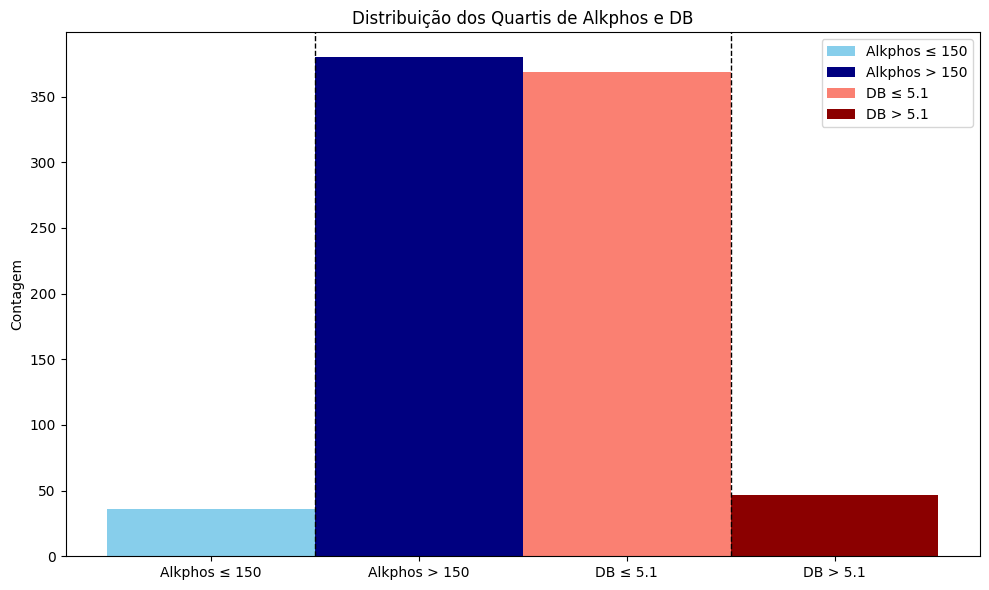

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Gerar dados simulados para Alkphos e DB com base nos quartis anteriores
alkphos_values = dados_quartiles['Alkphos']  # Substitua pelo nome correto do dataframe
db_values = dados_quartiles['DB']            # Substitua pelo nome correto do dataframe

# Dividir Alkphos e DB em duas categorias com base nos seus quartis
alkphos_split = alkphos_values <= 150  # Ponto de divisão para Alkphos
db_split = db_values <= 5.1            # Ponto de divisão para DB

# Contagem de cada categoria
alkphos_counts = [sum(alkphos_split), sum(~alkphos_split)]
db_counts = [sum(db_split), sum(~db_split)]

# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar barras para Alkphos
plt.bar([0.5], [alkphos_counts[0]], width=1, color='skyblue', label='Alkphos ≤ 150')
plt.bar([1.5], [alkphos_counts[1]], width=1, color='navy', label='Alkphos > 150')

# Plotar barras para DB
plt.bar([2.5], [db_counts[0]], width=1, color='salmon', label='DB ≤ 5.1')
plt.bar([3.5], [db_counts[1]], width=1, color='darkred', label='DB > 5.1')

# Adicionar linhas para divisão
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axvline(x=3, color='black', linestyle='--', linewidth=1)

# Customizar gráfico
plt.title('Distribuição dos Quartis de Alkphos e DB')
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Alkphos ≤ 150', 'Alkphos > 150', 'DB ≤ 5.1', 'DB > 5.1'])
plt.ylabel('Contagem')
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [ ]:
dados_quartiles.to_excel('Analise_ScoreAllVariables.xlsx')

In [ ]:
dados_quartiles

ID  Age  Alkphos   DB  Gender    TB  Sgpt  Sgot   TP  ALB  AGRatio  \
0      0.0   65    187.0  0.1       0   0.7    16    18  6.8  3.3     0.90   
1      1.0   62    699.0  5.5       1  10.9    64   100  7.5  3.2     0.74   
2      2.0   62    490.0  4.1       1   7.3    60    68  7.0  3.3     0.89   
3      3.0   58    182.0  0.4       1   1.0    14    20  6.8  3.4     1.00   
4      4.0   72    195.0  2.0       1   3.9    27    59  7.3  2.4     0.40   
..     ...  ...      ...  ...     ...   ...   ...   ...  ...  ...      ...   
411  367.0   32    289.0  8.2       1  15.0    58    80  5.3  2.2     0.70   
412  368.0   32    190.0  8.4       1  12.7    28    47  5.4  2.6     0.90   
413  369.0   40     98.0  0.1       1   0.6    35    31  6.0  3.2     1.10   
414  370.0   52    245.0  0.2       1   0.8    48    49  6.4  3.2     1.00   
415  371.0   31    184.0  0.5       1   1.3    29    32  6.8  3.4     1.00   

     Cluster Jornal  Cluster Conferencia  Score_AGRatio  Score_Alkphos  \
0                 1                  3.0              2              1   
1                 0                  0.0              3              2   
2                 0                  0.0              2              1   
3                 1                  3.0              1              1   
4                 1                  0.0              4              1   
..              ...                  ...            ...            ...   
411               5                  1.0              3              1   
412               5                  1.0              2              1   
413               2                  3.0              1              0   
414               2                  2.0              1              1   
415               4                  3.0              1              1   

     Score_DB  Score_ALB  Score_Sgot  Score  
0           0          1         0.0    2.0  
1           1          1         1.0    5.0  
2           0          1         1.0    3.0  
3           0          1         0.0    2.0  
4           0          2         1.0    4.0  
..        ...        ...         ...    ...  
411         1          3         1.0    6.0  
412         1          2         1.0    5.0  
413         0          1         0.0    1.0  
414         0          1         1.0    3.0  
415         0          1         0.0    2.0  

[416 rows x 19 columns]

In [ ]:
resultadoJornal = dados_quartiles.groupby(['Cluster Jornal', 'Score']).size().reset_index(name='Quantidade')
resultadoConferencia = dados_quartiles.groupby(['Cluster Conferencia', 'Score']).size().reset_index(name='Quantidade')

In [ ]:
print(f'Total Conferencia:{sum(resultadoJornal["Quantidade"])} e Jornal :{sum(resultadoConferencia["Quantidade"])}')

Total Conferencia:416 e Jornal :372


In [ ]:
resultadoJornal.to_excel('resultadoJornal.xlsx')
resultadoConferencia.to_excel('resultadoConferencia.xlsx')